# Facebook Ad-Campaign Analysis

In [1]:
import pandas as pd

df = pd.read_csv('sales-data.csv')
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


According to the author:

 - ad_id: an unique ID for each ad.

 - xyzcampaignid: an ID associated with each ad campaign of XYZ company.

 - fbcampaignid: an ID associated with how Facebook tracks each campaign.

 - age: age of the person to whom the ad is shown.

 - gender: gender of the person to whim the add is shown

 - interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

 - Impressions: the number of times the ad was shown.

 - Clicks: number of clicks on for that ad.

 - Spent: Amount paid by company xyz to Facebook, to show that ad.

 - Total conversion: Total number of people who enquired about the product after seeing the ad.

 - Approved conversion: Total number of people who bought the product after seeing the ad.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [3]:
df.shape

(1143, 11)

Since there each column has a 1143 non-null count and there are 1143 rows in the dataset there are non null values in the data to clean/fill.

In [4]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


 - Min sales per ad is 0
 - Max sales per ad is 21
 - Conversion rate between clicking on the ad and buying the product is roughly 3%
 - Conversion rate between enquiring and selling is roughly 33%

Lets create a group of categorical and continuous data

In [5]:
categorical = [cname for cname in df.columns if df[cname].dtype == 'object']
categorical.append('interest')
categorical

['age', 'gender', 'interest']

In [6]:
numerical = [cname for cname in df.columns if df[cname].dtype != 'object']
del numerical[3]
numerical

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

Lets view the correlations between the data

Text(0.5, 1.0, 'Numerical correlations')

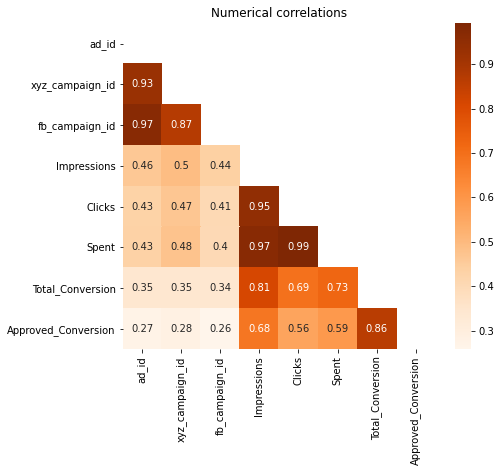

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr = df[numerical].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7, 6))
cor_heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap='Oranges')
cor_heatmap.set_title('Numerical correlations')

Strong correlations between:
 - Clicks and Impressions
 - Spent and Impressions
 - Spent and Clicks
 - Total_Conversion and Impressions
 - Total_Conversion and Clicks
 - Total_Conversion and Spent
 - Approved_Conversion and Impressions
 - Approved_Conversion and Clicks
 - Approved_Conversion and Spent
 - Approved_Conversion and Total_Conversion

### Who are clicking on the products?

Find out the ages and genders that are clicking on the products.

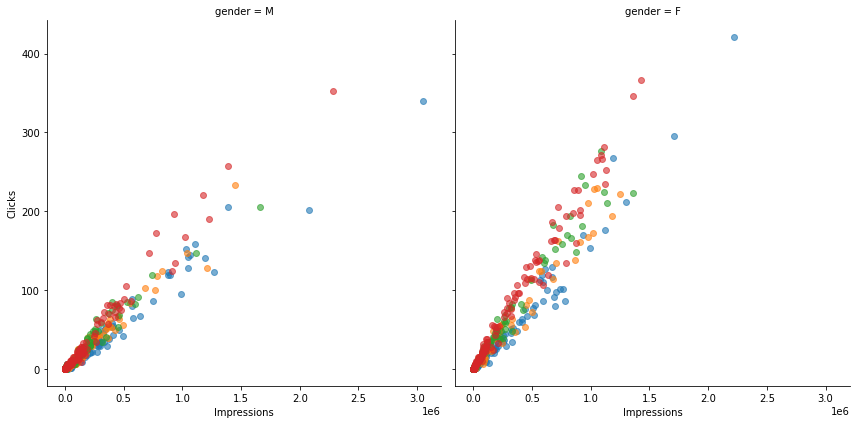

In [18]:
impression_clicks = sns.FacetGrid(col='gender', hue='age', data=df, height=6)
impression_clicks.map(plt.scatter, 'Impressions', 'Clicks', alpha=0.6)
impression_clicks.add_legend()